<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q1-PLN/blob/main/2023_Q1_PLN_Notebook_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q1]**
Prof. Alexandre Donizeti Alves

## **Modelagem de Tópicos com Top2Vec**
---



**Top2Vec** é uma técnica de aprendizado de máquina para descoberta de tópicos que permite descobrir tópicos subjacentes em grandes conjuntos de dados não estruturados, como documentos de texto. Ela é capaz de representar todo o corpus em um espaço vetorial, onde os tópicos são encontrados como clusters.

Top2Vec pode ser uma escolha ideal para a descoberta de tópicos em grandes conjuntos de dados de texto. Ele oferece várias vantagens em relação a outras técnicas de modelagem de tópicos:

   * Não é necessário definir o número de tópicos com antecedência: ao contrário de outras técnicas, como LDA ou NMF, Top2Vec não requer que você defina o número de tópicos antes de executar o algoritmo. Isso torna a descoberta de tópicos mais flexível e adaptável às necessidades específicas do seu conjunto de dados.

   * Descoberta de tópicos robusta: Top2Vec é capaz de descobrir tópicos robustos, mesmo em conjuntos de dados complexos, como notícias ou mídia social. É capaz de lidar com documentos que abrangem vários tópicos e pode criar tópicos que capturam a sobreposição entre tópicos.

   * Escalabilidade: Top2Vec é escalável e pode lidar com grandes conjuntos de dados de texto que são muito grandes para caber na memória do computador. Isso é possível porque é utilizada uma técnica de amostragem inteligente para reduzir o tamanho do corpus de entrada.

   * Fácil interpretação: os tópicos descobertos pelo Top2Vec podem ser facilmente interpretados porque são representados como clusters no espaço vetorial. Além disso, é possível visualizar os clusters em um gráfico para obter uma visão geral dos tópicos e como eles se relacionam entre si.

No geral, Top2Vec é uma técnica de aprendizado de máquina muito útil para a descoberta de tópicos em grandes conjuntos de dados de texto e pode ser uma ferramenta valiosa para a análise de dados de texto em vários campos, incluindo jornalismo, ciência política, negócios e tecnologia.

**Primeiro Exemplo**

Inicialmente, é necessário instalar a biblioteca `top2vec`:

In [ ]:
!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


O `top2Vec[sentence_encoders]` é uma extensão do algoritmo Top2Vec que utiliza modelos de codificação de sentenças pré-treinados para representar os documentos de entrada. 

Com o `top2Vec[sentence_encoders]`, os documentos são codificados em um espaço de alta dimensionalidade por meio do modelo de codificação de sentenças, e o algoritmo Top2Vec é então aplicado a essas representações para descobrir tópicos semelhantes aos documentos originais. 

In [ ]:
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


O `"universal-sentence-encoder"` é um modelo pré-treinado de codificação de sentenças que é frequentemente usado em conjunto com o algoritmo Top2Vec para descobrir tópicos semelhantes em documentos. Para usá-lo, você precisa ter o modelo instalado ou baixado em seu ambiente Python.

In [ ]:
!pip install tensorflow tensorflow_hub tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd

# Ler o arquivo CSV em um dataframe do Pandas
df = pd.read_csv('/content/McDonalds-Yelp-Sentiment-DFE.csv',  usecols=['review'],
                 encoding="unicode_escape",)

# Imprimir as primeiras linhas do dataframe
print(df)

                                                 review
0     I'm not a huge mcds lover, but I've been to be...
1     Terrible customer service. Î¾I came in at 9:30...
2     First they "lost" my order, actually they gave...
3     I see I'm not the only one giving 1 star. Only...
4     Well, it's McDonald's, so you know what the fo...
...                                                 ...
1520  I enjoyed the part where I repeatedly asked if...
1521  Worst McDonalds I've been in in a long time! D...
1522  When I am really craving for McDonald's, this ...
1523  Two points right out of the gate: 1. Thuggery ...
1524  I wanted to grab breakfast one morning before ...

[1525 rows x 1 columns]


In [ ]:
lista_reviews = df["review"].values.tolist()

In [ ]:
import warnings

warnings.filterwarnings("ignore",category=UserWarning)

In [ ]:
from top2vec import Top2Vec

topic_model = Top2Vec(lista_reviews, embedding_model="universal-sentence-encoder")

2023-04-07 13:24:49,040 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-04-07 13:24:49,538 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-04-07 13:25:12,042 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-07 13:25:13,860 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-07 13:25:34,683 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-07 13:25:34,745 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
topic_model.get_num_topics() 

2

In [ ]:
topic_model.topic_words

array([['mcdonalds', 'mcd', 'mcdonald', 'fries', 'burger', 'menu',
        'order', 'nuggets', 'customer', 'ordering', 'ordered', 'service',
        'orders', 'cashier', 'customers', 'management', 'iced', 'meal',
        'ketchup', 'sandwich', 'restaurant', 'manager', 'lunch', 'food',
        'employees', 'horrible', 'breakfast', 'terrible', 'seriously',
        'chicken', 'slow', 'rude', 'busy', 'waiting', 'receipt', 'went',
        'bad', 'attitude', 'tasted', 'parking', 'sausage', 'waited',
        'call', 'quality', 'expect', 'really', 'fast', 'employee',
        'staff', 'working'],
       ['coffee', 'iced', 'mcdonalds', 'mcd', 'mcdonald', 'cup', 'tea',
        'fries', 'customer', 'ordered', 'breakfast', 'customers',
        'cream', 'menu', 'orders', 'cashier', 'order', 'morning', 'coke',
        'ordering', 'soda', 'extra', 'parking', 'nuggets', 'asked',
        'hot', 'seriously', 'manager', 'second', 'employees', 'lunch',
        'management', 'service', 'call', 'receipt', 's

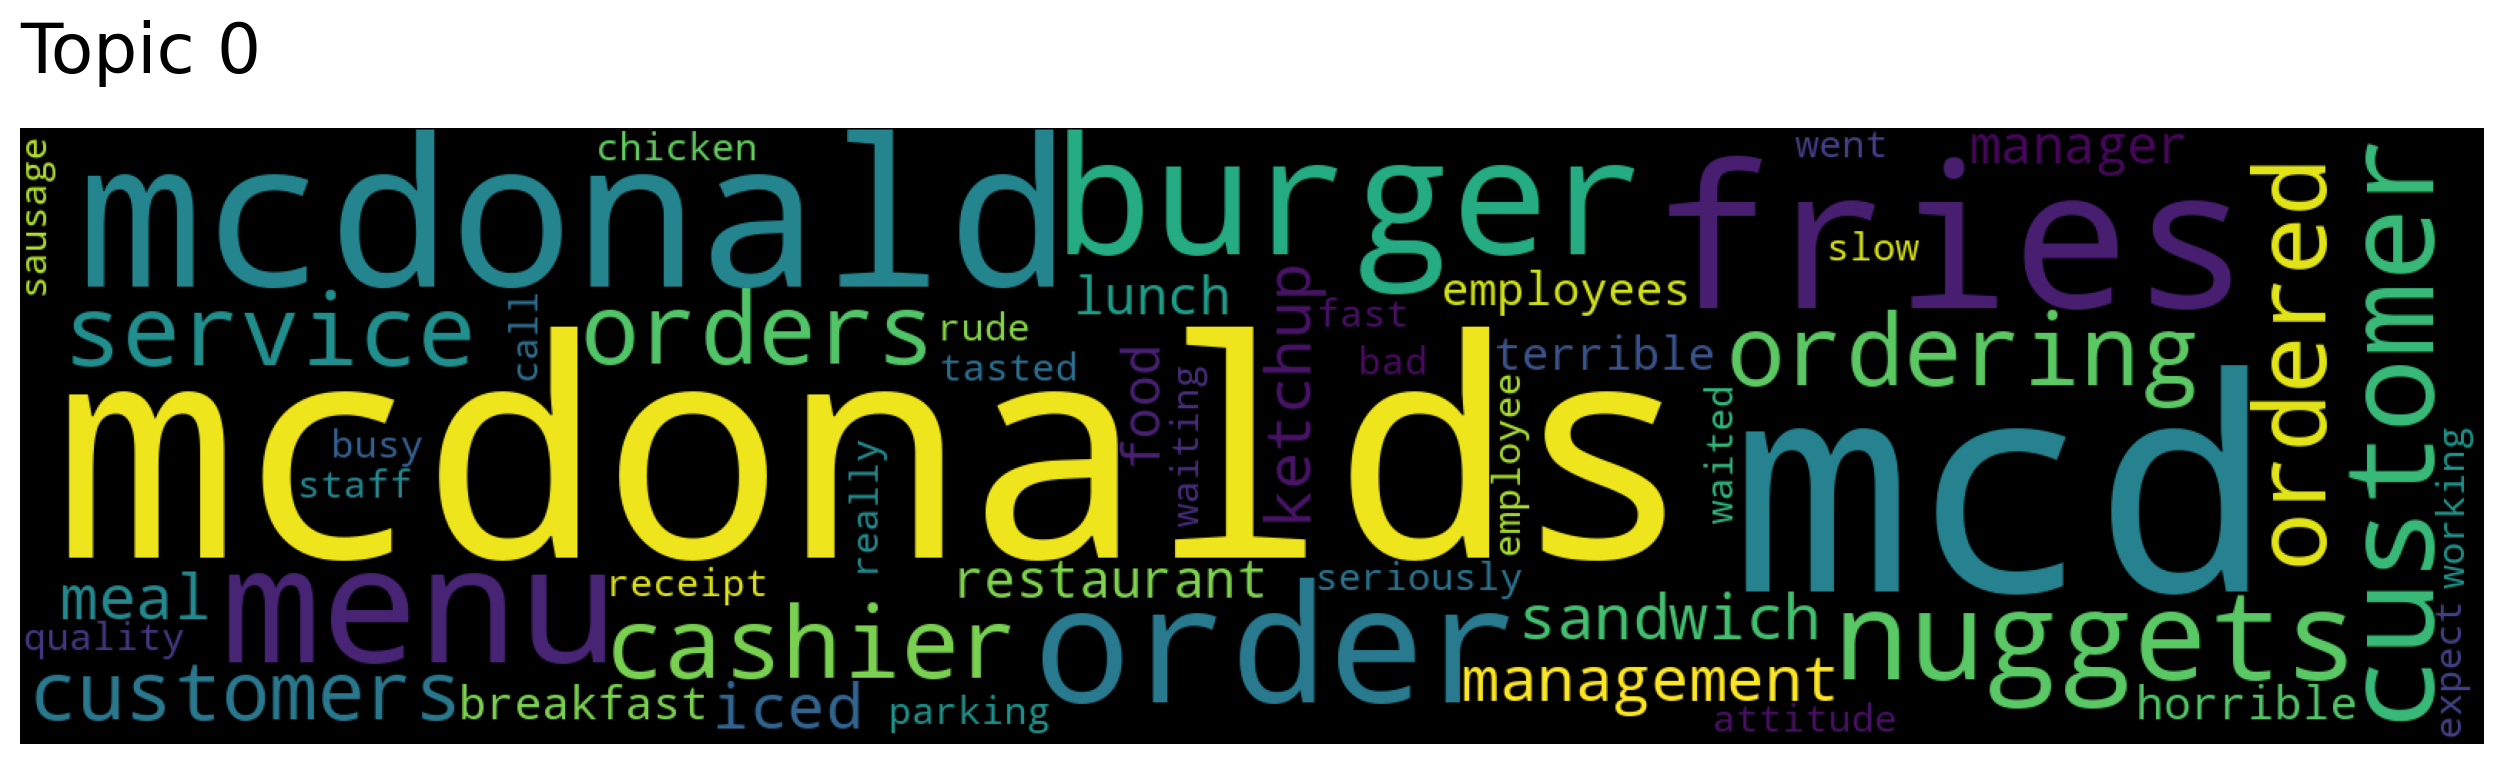

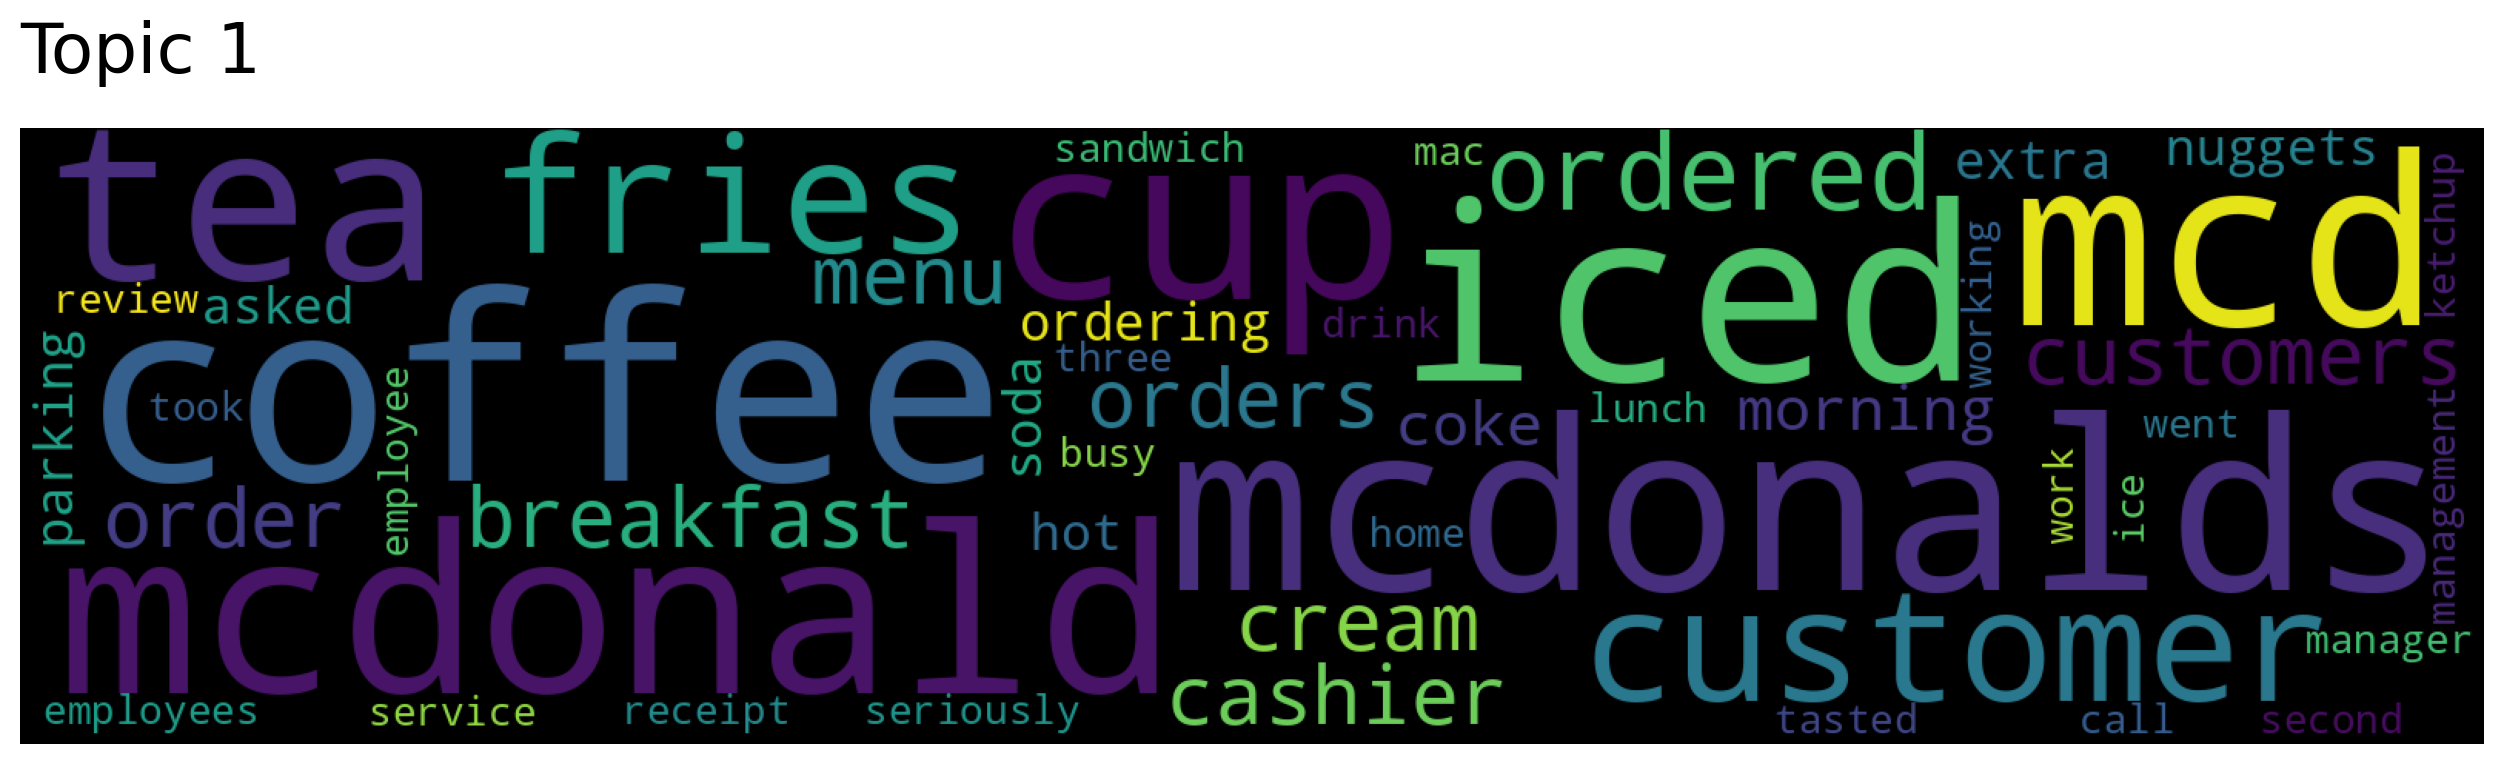

In [ ]:
topic_words, word_scores, topic_nums = topic_model.get_topics()

for topic in topic_nums:
    topic_model.generate_topic_wordcloud(topic)

In [ ]:
topic_words

array([['mcdonalds', 'mcd', 'mcdonald', 'fries', 'burger', 'menu',
        'order', 'nuggets', 'customer', 'ordering', 'ordered', 'service',
        'orders', 'cashier', 'customers', 'management', 'iced', 'meal',
        'ketchup', 'sandwich', 'restaurant', 'manager', 'lunch', 'food',
        'employees', 'horrible', 'breakfast', 'terrible', 'seriously',
        'chicken', 'slow', 'rude', 'busy', 'waiting', 'receipt', 'went',
        'bad', 'attitude', 'tasted', 'parking', 'sausage', 'waited',
        'call', 'quality', 'expect', 'really', 'fast', 'employee',
        'staff', 'working'],
       ['coffee', 'iced', 'mcdonalds', 'mcd', 'mcdonald', 'cup', 'tea',
        'fries', 'customer', 'ordered', 'breakfast', 'customers',
        'cream', 'menu', 'orders', 'cashier', 'order', 'morning', 'coke',
        'ordering', 'soda', 'extra', 'parking', 'nuggets', 'asked',
        'hot', 'seriously', 'manager', 'second', 'employees', 'lunch',
        'management', 'service', 'call', 'receipt', 's

Também é possível pesquisar documentos usando palavras-chave.

A função `search_documents_by_keywords` é uma função do Top2Vec que permite encontrar documentos relevantes para um conjunto de palavras-chave específico. A função aceita uma lista de palavras-chave e retorna uma lista de documentos do corpus que correspondem às palavras-chave.

A função usa uma técnica chamada "busca booleana" para localizar documentos relevantes. Ela começa criando uma matriz booleana que indica se cada palavra-chave aparece em cada documento do corpus. Em seguida, ela combina as matrizes de palavras-chave usando operadores booleanos (como AND, OR e NOT) para produzir uma matriz combinada. Finalmente, ela usa a matriz combinada para selecionar os documentos que correspondem às palavras-chave.

In [ ]:
documents, document_scores, document_ids = topic_model.search_documents_by_keywords(
                                           keywords=["slow", "horrible"], num_docs=5)

for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 181, Score: 0.5198288496295017
-----------
Awful service and extremely slow. Go elsewhere.
-----------

Document: 214, Score: 0.46719682346048563
-----------
Terrible service, plain and simple!
-----------

Document: 930, Score: 0.3856315928722381
-----------
No drive through :-/
-----------

Document: 320, Score: 0.36098558587491075
-----------
fast, Î¾a little toooo fast
-----------

Document: 367, Score: 0.35639834225681133
-----------
No Hot Mustard :(
-----------



In [ ]:
lista_reviews[181]

'Awful service and extremely slow. Go elsewhere.'

Agora vamos agora pesquisar o tópico com uma determinada palavra-chave:

In [ ]:
# Realizando a busca por tópicos relacionados à palavra "slow"
topic_words, word_scores, topic_scores, topic_nums = topic_model.search_topics(keywords=["slow"], num_topics=2)

# Imprimindo os resultados da busca
for index, score in zip(topic_nums, topic_scores):
    print(f"Topic Index: {index} | Score: {score}")

Topic Index: 0 | Score: 0.15463436410747394
Topic Index: 1 | Score: 0.07553670826405821


In [ ]:
topic_words[0]

array(['mcdonalds', 'mcd', 'mcdonald', 'fries', 'burger', 'menu', 'order',
       'nuggets', 'customer', 'ordering', 'ordered', 'service', 'orders',
       'cashier', 'customers', 'management', 'iced', 'meal', 'ketchup',
       'sandwich', 'restaurant', 'manager', 'lunch', 'food', 'employees',
       'horrible', 'breakfast', 'terrible', 'seriously', 'chicken',
       'slow', 'rude', 'busy', 'waiting', 'receipt', 'went', 'bad',
       'attitude', 'tasted', 'parking', 'sausage', 'waited', 'call',
       'quality', 'expect', 'really', 'fast', 'employee', 'staff',
       'working'], dtype='<U10')

Também é possível fazer uma busca pelos documentos de um determinado tópico:

In [ ]:
documents, document_scores, document_nums = topic_model.search_documents_by_topic(topic_num=1, num_docs=5)
    
for doc, score, doc_id in zip(documents, document_scores, document_nums):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1364, Score: 0.8451168537139893
-----------
First of all...this location takes FOREVER! I came in for a simple iced coffee. Î¾Asked for a splash of cream and no sugar...cashier looked at me like I had 3 heads. Î¾Didn't realize that was such a diva request?! Î¾Then the girl making the coffee had to double check what I was asking for...seriously?!? And these workers think they deserve more $$! Î¾Sadly I like McDonald's coffee way better than Starbucks..but a simple request is asking them for too much. Î¾Good coffee. Î¾Horrible service. A plain iced coffee should not take 20 minutes, especially when there are only 2 people ahead of you. Î¾Oh, and I forgot to mention my "splash" of cream looks like they dumped the whole damn bottle in there..looks more like a splash of coffee. Î¾See pic!
-----------

Document: 448, Score: 0.8412178754806519
-----------
Finally left early enough for work to allow me to get a McD's coffee. I don't like the fancy coffees, just regular coffee with cr

Também é possível realizar uma busca por palavras similares:

In [ ]:
 words, word_scores = topic_model.similar_words(keywords=["slow", "horrible"], num_words=20)
  
 for word, score in zip(words, word_scores):
    print(f"{word} {score}")

terrible 0.7962665351319176
bad 0.7078454775157028
hard 0.6201915005105798
fast 0.6038723761160428
rude 0.5536033981196522
wrong 0.5436848017418402
quick 0.5357031660321512
doesn 0.5307938330231128
dirty 0.5294171569775319
worst 0.5196681362033617
not 0.5167238801516343
long 0.515689973440906
very 0.5133121113525305
hot 0.511780749151117
far 0.507173947138429
cold 0.5067328688659365
still 0.5038338092546368
late 0.5031754070874418
down 0.5017697412040363
little 0.49894763707911205


 **Conjunto de Dados [20 Newsgroups]**

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# carregar todas as categorias disponíveis
newsgroups_data = fetch_20newsgroups(subset='all')

# mostrar a lista de categorias
newsgroups_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# lista das categorias que queremos manter
categories = ['sci.space', 'rec.autos']

# carregar apenas os dados dessas categorias
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# transformar em um dataframe do pandas
df = pd.DataFrame({'text': newsgroups_data.data, 'category': newsgroups_data.target})

df

,text,category
0,From: hathaway@stsci.edu\nSubject: Re: Vandali...,1
1,From: eliot@engr.washington.edu (eliot)\nSubje...,0
2,From: aas7@po.CWRU.Edu (Andrew A. Spencer)\nSu...,0
3,From: Leigh Palmer <palmer@sfu.ca>\nSubject: R...,1
4,From: tvervaek@col.hp.com (Tom Vervaeke)\nSubj...,0
...,...,...
1972,From: mrw9e@fulton.seas.Virginia.EDU (Michael ...,1
1973,From: dchan@cisco.com (Derek Chan)\nSubject: R...,0
1974,From: 6500alh@ucsbuxa.ucsb.edu (Archie Holmes)...,0
1975,From: prb@access.digex.net (Pat)\nSubject: Re:...,1


In [ ]:
# contar o número de textos para cada categoria
contagem_idades = df['category'].value_counts()
print(contagem_idades)

0    990
1    987
Name: category, dtype: int64


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import gensim

# define as stopwords em inglês
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# função para pré-processar o texto
def pre_processamento(text):
    # converte o texto em minúsculas e remove caracteres especiais
    text = text.lower()
    text = gensim.utils.simple_preprocess(text, deacc=True)

    # remove as stopwords
    text = [w for w in text if w not in stop_words]

    # junta as palavras novamente em um texto e retorna o texto pré-processado
    return ' '.join(text)

# pré-processa o texto
df['clean_text'] = df['text'].apply(pre_processamento)

In [ ]:
df

,text,category,clean_text
0,From: hathaway@stsci.edu\nSubject: Re: Vandali...,1,hathaway stsci vandalizing sky lines organizat...
1,From: eliot@engr.washington.edu (eliot)\nSubje...,0,eliot engr washington eliot review audi quattr...
2,From: aas7@po.CWRU.Edu (Andrew A. Spencer)\nSu...,0,aas po cwru andrew spencer mr noisy engine org...
3,From: Leigh Palmer <palmer@sfu.ca>\nSubject: R...,1,leigh palmer palmer sfu ca orion drive vacuum ...
4,From: tvervaek@col.hp.com (Tom Vervaeke)\nSubj...,0,tvervaek col hp com tom vervaeke toyota land c...
...,...,...,...
1972,From: mrw9e@fulton.seas.Virginia.EDU (Michael ...,1,mrw fulton seas virginia michael robert willia...
1973,From: dchan@cisco.com (Derek Chan)\nSubject: R...,0,dchan cisco com derek chan service indicator b...
1974,From: 6500alh@ucsbuxa.ucsb.edu (Archie Holmes)...,0,alh ucsbuxa ucsb archie holmes prizm radio que...
1975,From: prb@access.digex.net (Pat)\nSubject: Re:...,1,prb access digex net pat hst servicing mission...


In [ ]:
from top2vec import Top2Vec

topic_model = Top2Vec(df['clean_text'].values.tolist(), embedding_model="universal-sentence-encoder")

2023-04-07 14:09:25,963 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-04-07 14:09:27,866 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-04-07 14:09:35,194 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-07 14:09:38,510 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-07 14:09:49,121 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-07 14:09:49,187 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
topic_model.get_num_topics() 

3

In [ ]:
# extrair os tópicos principais
topic_sizes, topic_nums = topic_model.get_topic_sizes()

print('Número de tópicos:', len(topic_sizes))
print('Tamanho dos tópicos:', topic_sizes)

Número de tópicos: 3
Tamanho dos tópicos: [1019  915   43]


In [ ]:
topic_model.topic_words

array([['nasa', 'jpl', 'satellites', 'orbits', 'astronomers', 'caltech',
        'spacecraft', 'orbiting', 'oort', 'orbiter', 'aerospace',
        'planetary', 'orbital', 'propulsion', 'satellite', 'manned',
        'ssto', 'astronaut', 'orbit', 'galileo', 'mars', 'telescope',
        'astronomical', 'moon', 'space', 'kelvin', 'astronomy', 'mit',
        'rocket', 'probes', 'planets', 'billion', 'apollo', 'flyby',
        'earth', 'galaxy', 'lunar', 'gravity', 'cmu', 'titan', 'uiuc',
        'saturn', 'significant', 'kilometers', 'uci', 'magellan', 'sci',
        'gov', 'payload', 'urbana'],
       ['chevy', 'vw', 'ford', 'bmw', 'toyota', 'opel', 'gm',
        'automotive', 'mazda', 'honda', 'brakes', 'cars', 'caltech',
        'transmission', 'engines', 'nissan', 'ssf', 'camaro', 'mit',
        'truck', 'uiuc', 'engr', 'motor', 'drive', 'driving', 'car',
        'mustang', 'larson', 'uci', 'engine', 'kelvin', 'ca', 'miles',
        'kilometers', 'general', 'integra', 'cs', 'everything